<a href="https://colab.research.google.com/github/tkhan3/machinelearning/blob/master/hr_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
#import pandas as pd
!google-drive-ocamlfuse drive
!apt-get -qq install -y graphviz && pip install -q pydot
!pip3 install seaborn==0.9.0
import pydot
!mkdir -p drive
!google-drive-ocamlfuse drive

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 110845 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [0]:
import pandas as pd
from datetime import datetime
import os

drive_path = 'drive/DL_COLAB/'

HR_ANALYTICS_PATH = os.path.join(drive_path,"hr_analytics")


In [2]:
print (HR_ANALYTICS_PATH)

drive/DL_COLAB/hr_analytics


In [0]:
import pandas as pd

def load_hr_data(filename, file_path=HR_ANALYTICS_PATH):
    csv_path = os.path.join(file_path, filename)
    return pd.read_csv(csv_path,sep="|")

In [0]:
hr_data_full = load_hr_data("new_Attrition_Data.csv")

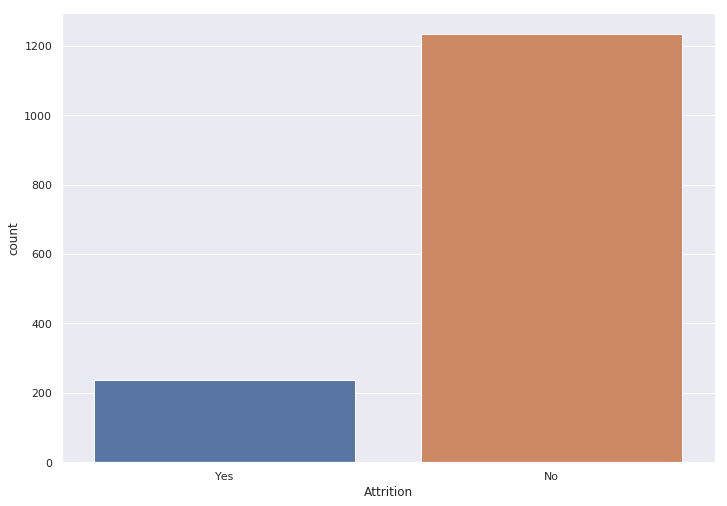

In [5]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x="Attrition",data=hr_data_full)

In [6]:
hr_data_full.shape

(1470, 33)

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(hr_data_full, hr_data_full["Attrition"]):
    hr_data_train = hr_data_full.loc[train_index]
    hr_data_test = hr_data_full.loc[test_index]

In [8]:
print (hr_data_train["Attrition"].value_counts())
print (hr_data_test["Attrition"].value_counts())

No     986
Yes    190
Name: Attrition, dtype: int64
No     247
Yes     47
Name: Attrition, dtype: int64


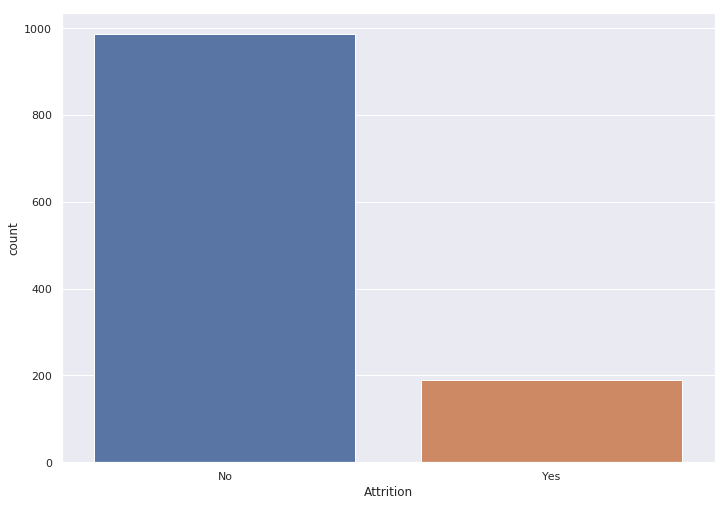

In [9]:
sns.countplot(x="Attrition",data=hr_data_train)

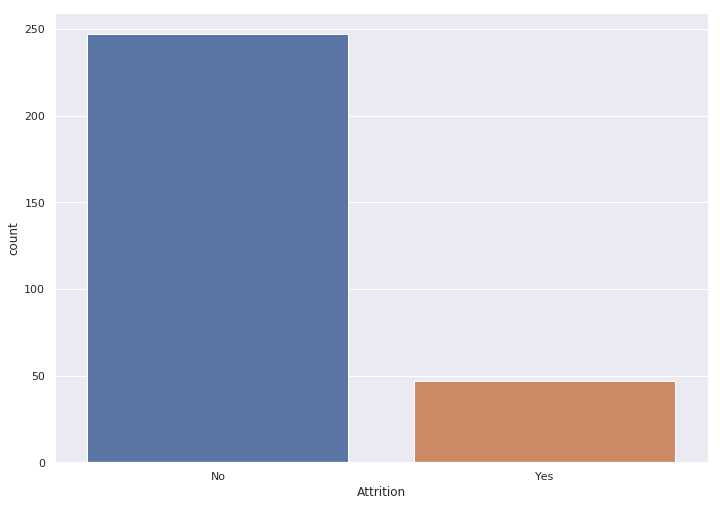

In [10]:
sns.countplot(x="Attrition",data=hr_data_test)

In [11]:
print (hr_data_train.shape)

(1176, 33)


In [12]:
print (hr_data_test.shape)

(294, 33)


**Assigning hr_data_train to hr_data**

In [0]:
hr_data = hr_data_train

In [14]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 1194 to 1292
Data columns (total 33 columns):
Age                         1176 non-null int64
Attrition                   1176 non-null object
BusinessTravel              1176 non-null object
DailyRate                   1176 non-null int64
Department                  1176 non-null object
DistanceFromHome            1176 non-null int64
Education                   1176 non-null int64
EmployeeCount               1176 non-null int64
EmployeeNumber              1176 non-null int64
EnvironmentSatisfaction     1176 non-null int64
Gender                      1176 non-null object
HourlyRate                  1176 non-null int64
JobInvolvement              1176 non-null int64
JobLevel                    1176 non-null int64
JobRole                     1176 non-null object
JobSatisfaction             1176 non-null int64
MaritalStatus               1176 non-null object
MonthlyIncome               1176 non-null int64
MonthlyRate         

In [15]:
hr_data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1176.000000  1176.000000       1176.000000  1176.000000         1176.0   
mean     36.998299   803.991497          9.357993     2.906463            1.0   
std       9.178142   401.339423          8.179803     1.027996            0.0   
min      18.000000   103.000000          1.000000     1.000000            1.0   
25%      30.000000   467.750000          2.000000     2.000000            1.0   
50%      36.000000   799.500000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1176.000000              1176.000000  1176.000000     1176.000000   
mean      1015.830782                 2.716837    65.500000        2.737245   
std        599.657438                 1.088707    20.373324        0.703673   
min          1.000000                 1.000000    30.000000        1.000000   
25%        487.750000                 2.000000    48.000000        2.000000   
50%       1004.500000                 3.000000    66.000000        3.000000   
75%       1547.250000                 4.000000    83.000000        3.000000   
max       2062.000000                 4.000000   100.000000        4.000000   

          JobLevel          ...           RelationshipSatisfaction  \
count  1176.000000          ...                        1176.000000   
mean      2.076531          ...                           2.738946   
std       1.091987          ...                           1.087201   
min       1.000000          ...                           1.000000   
25%       1.000000          ...                           2.000000   
50%       2.000000          ...                           3.000000   
75%       3.000000          ...                           4.000000   
max       5.000000          ...                           4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         1176.0       1176.000000        1176.000000   
mean            80.0          0.790816          11.364796   
std              0.0          0.845786           7.801391   
min             80.0          0.000000           0.000000   
25%             80.0          0.000000           6.000000   
50%             80.0          1.000000          10.000000   
75%             80.0          1.000000          15.000000   
max             80.0          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1176.000000      1176.000000     1176.000000   
mean                2.760204         2.757653        7.050170   
std                 1.256262         0.718113        6.086612   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000       10.000000   
max                 6.000000         4.000000       37.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1176.000000              1176.000000           1176.000000  
mean             4.231293                 2.182823              4.196429  
std              3.569503                 3.215348              3.564795  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             17.000000                15.000000             17.000000  

[8 rows x 26 columns]

In [0]:
cat_attribute = ["Attrition","BusinessTravel","Department","Gender","JobRole","MaritalStatus","OverTime"]

In [17]:
for item in cat_attribute:
  print(hr_data[item].value_counts())
  print ("*************************")

No     986
Yes    190
Name: Attrition, dtype: int64
*************************
Travel_Rarely        828
Travel_Frequently    225
Non-Travel           123
Name: BusinessTravel, dtype: int64
*************************
Development        753
Marketing          179
Web Designing       69
Human Resources     56
QA & Testing        47
Networking          34
SEO                 21
Finance             10
Office Admin         7
Name: Department, dtype: int64
*************************
Male      704
Female    472
Name: Gender, dtype: int64
*************************
Software Developer              539
Project Manager                 199
Marketing Executive             167
Web Designer                     61
Human Resources                  43
Manager                          28
Associate Tester                 25
System Adminstrator              22
Internet Marketing Executive     20
QA & Testing                     10
Marketing Manager                 8
Finance Executive                 7
Marketing

In [0]:
#temp = hr_data[["Attrition", "Department"]].query('Attrition == \'Yes\'').groupby(['Department']).count()
#MaritalStatusprint (type(temp))
#print (temp.columns)
#temp.hist()
#print (temp)
#hr_data = hr_data.plot.bar(x='Attrition', y='Gender', rot=0).

# Most of the examples are from development and Marketing Department.

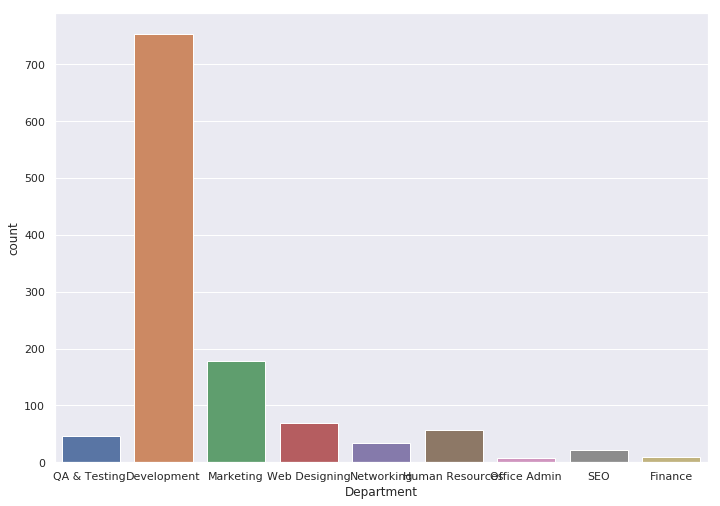

In [19]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x="Department",data=hr_data)

# Department wise attrition. 

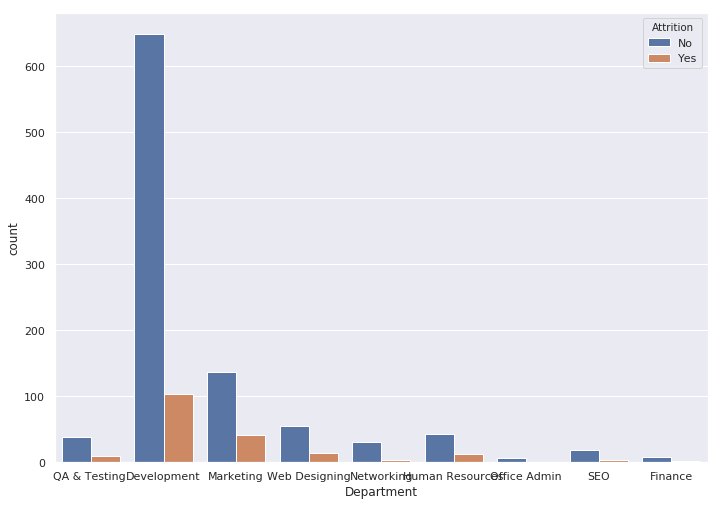

In [20]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x="Department",data=hr_data,hue='Attrition')

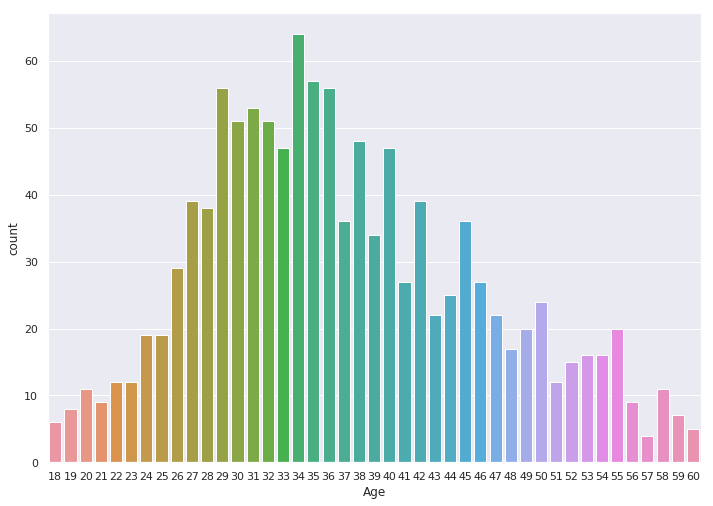

In [21]:
sns.countplot(x="Age",data=hr_data)

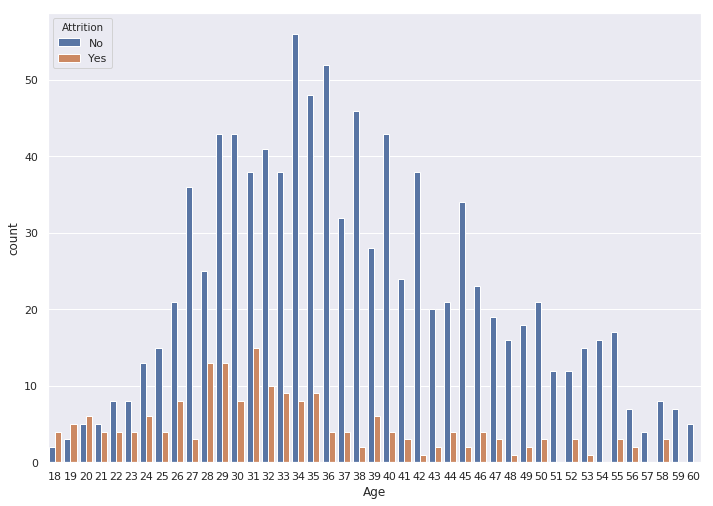

In [22]:
sns.countplot(x="Age",data=hr_data,hue='Attrition')

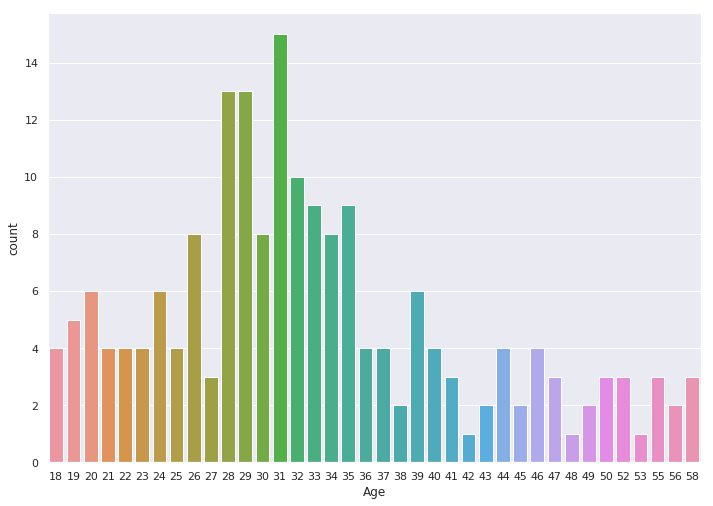

In [23]:
sns.countplot(x="Age",data=hr_data.query("Attrition == \'Yes\'"))

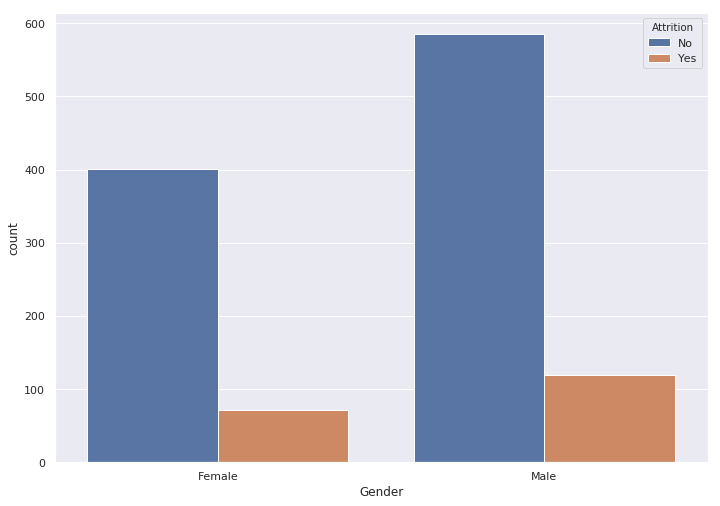

In [24]:
sns.countplot(x="Gender",data=hr_data,hue='Attrition')

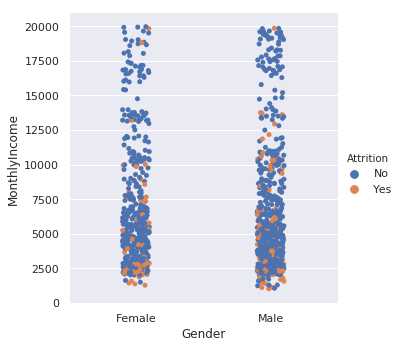

In [25]:
sns.catplot(x="Gender",y='MonthlyIncome',data=hr_data,hue='Attrition')

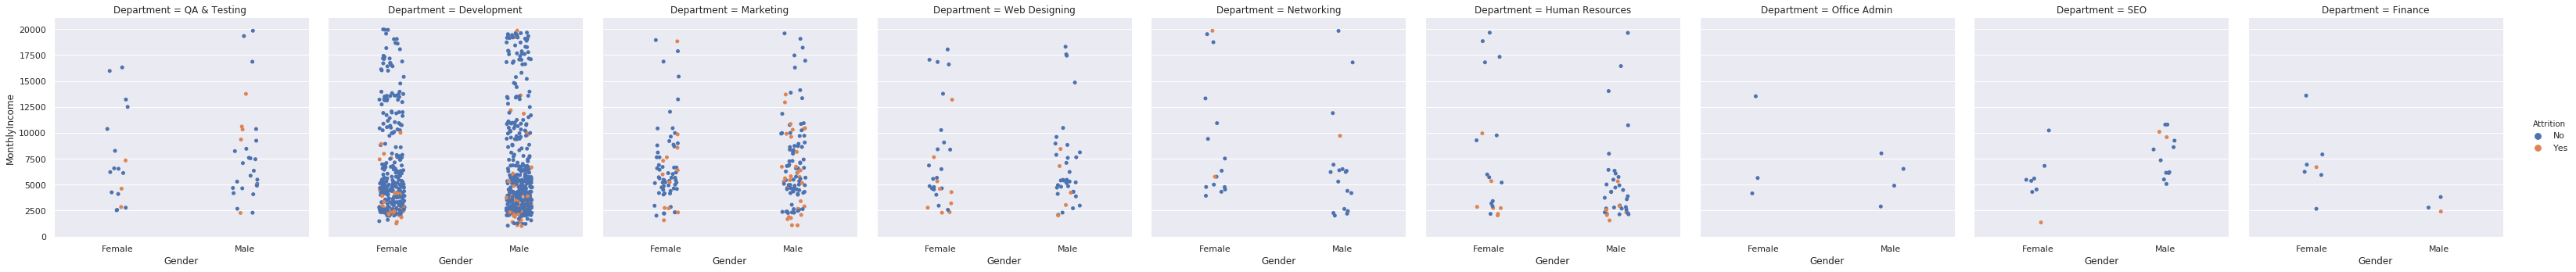

In [26]:
import seaborn as sns
sns.catplot(x="Gender",y='MonthlyIncome',col='Department',data=hr_data,hue='Attrition')

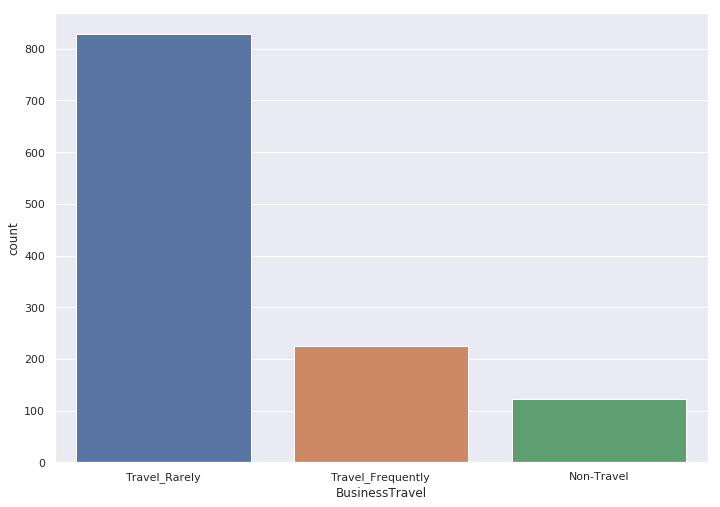

In [27]:
sns.countplot(x="BusinessTravel",data=hr_data)

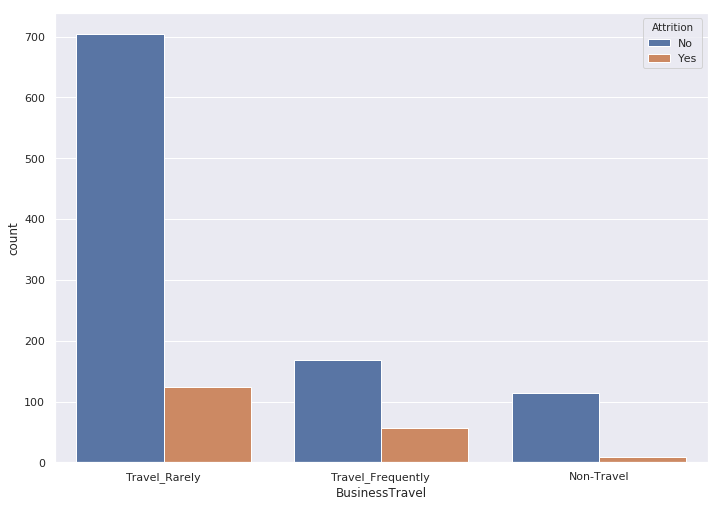

In [28]:
sns.countplot(x="BusinessTravel",data=hr_data,hue='Attrition')

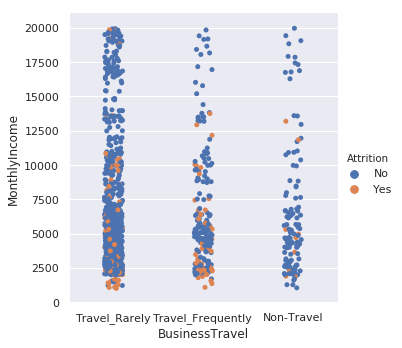

In [29]:
sns.catplot(x="BusinessTravel",y='MonthlyIncome',data=hr_data,hue='Attrition')

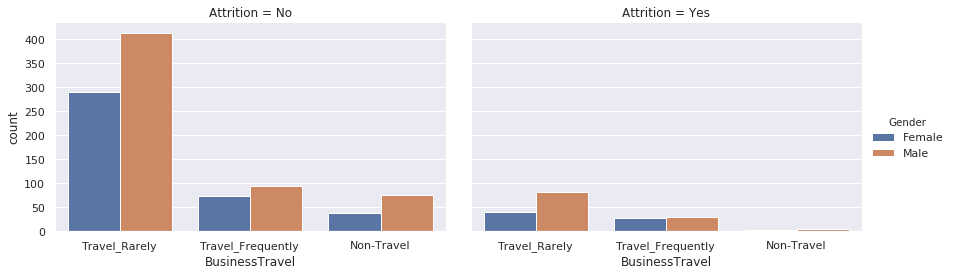

In [30]:
sns.catplot(x="BusinessTravel", hue="Gender", col="Attrition",data=hr_data, kind="count",height=4,aspect=1.5)

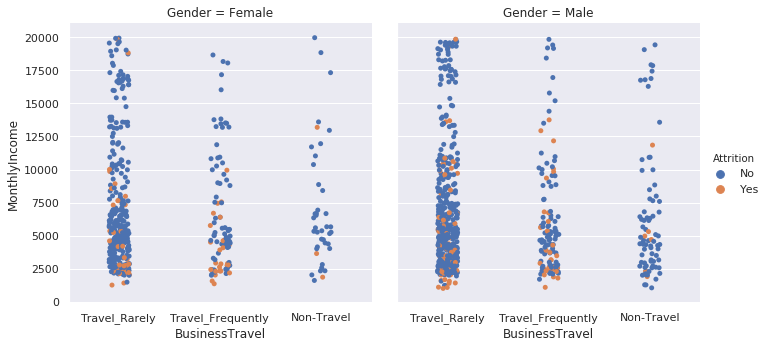

In [31]:
sns.catplot(x="BusinessTravel",y='MonthlyIncome',col='Gender',data=hr_data,hue='Attrition')

[Text(0,0,'Manager qA & Testing'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Marketing Manager'),
 Text(0,0,'Web Designer'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Project Manager'),
 Text(0,0,'Web Designer'),
 Text(0,0,'System Adminstrator'),
 Text(0,0,'Marketing Executive'),
 Text(0,0,'Project Manager'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Marketing Executive'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Marketing Executive'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Human Resources'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Associate Tester'),
 Text(0,0,'Marketing Executive'),
 Text(0,0,'Software Developer'),
 Text(0,0,'Web Designer'),
 Text(0,0,'Project Manager'),
 Text(0,0,'Software Developer'),
 Te

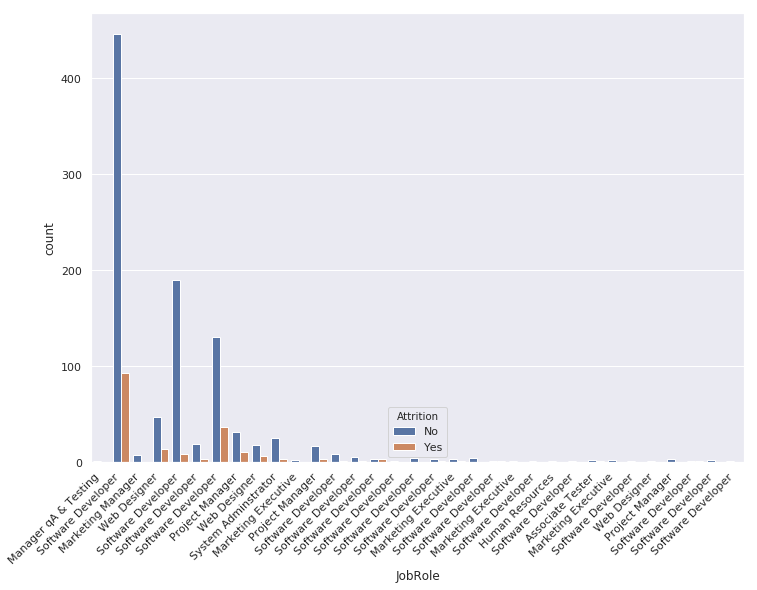

In [32]:
import matplotlib.pyplot as plt
fig = plt.figure(1)
ax = fig.add_subplot(111)
sns.set(rc={'figure.figsize':(11.7,5.7)})
sns.countplot(x="JobRole",data=hr_data,hue='Attrition')
xticklabels = hr_data["JobRole"]
ax.set_xticklabels(xticklabels, rotation = 45, ha="right")

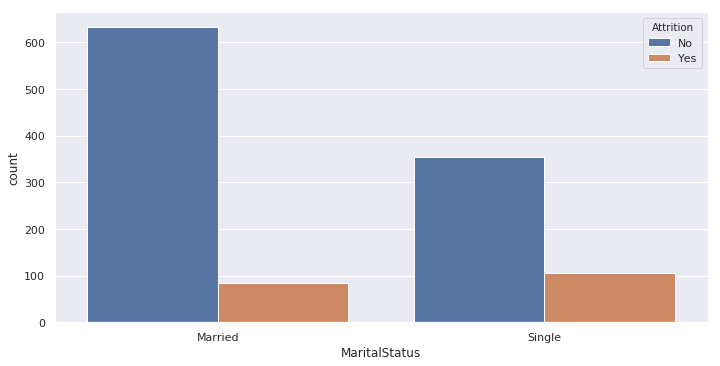

In [33]:
sns.set(rc={'figure.figsize':(11.7,5.7)})
sns.countplot(x="MaritalStatus",data=hr_data,hue='Attrition')

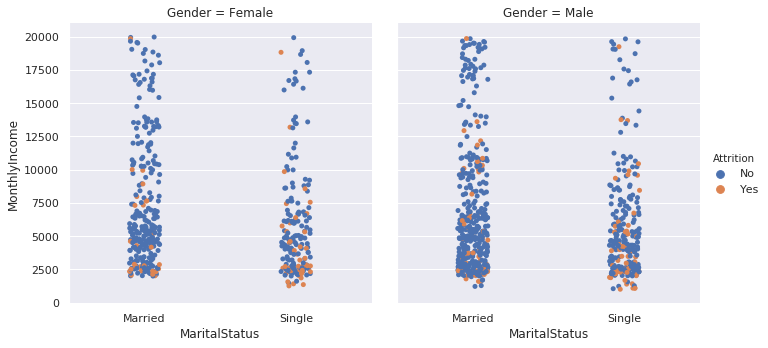

In [34]:
sns.catplot(x="MaritalStatus",y='MonthlyIncome',col='Gender',data=hr_data,hue='Attrition')

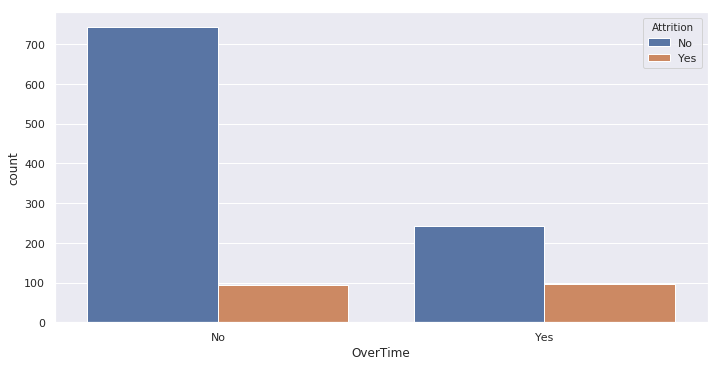

In [35]:
sns.set(rc={'figure.figsize':(11.7,5.7)})
sns.countplot(x="OverTime",data=hr_data,hue='Attrition')

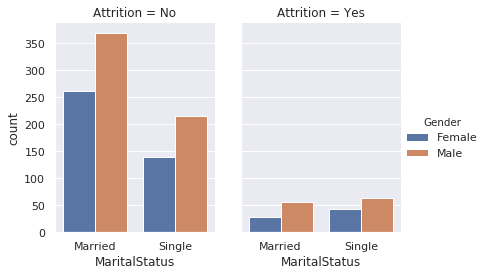

In [36]:
#import seaborn as sns
sns.catplot(x="MaritalStatus", hue="Gender", col="Attrition",data=hr_data, kind="count",height=4, aspect=.7)

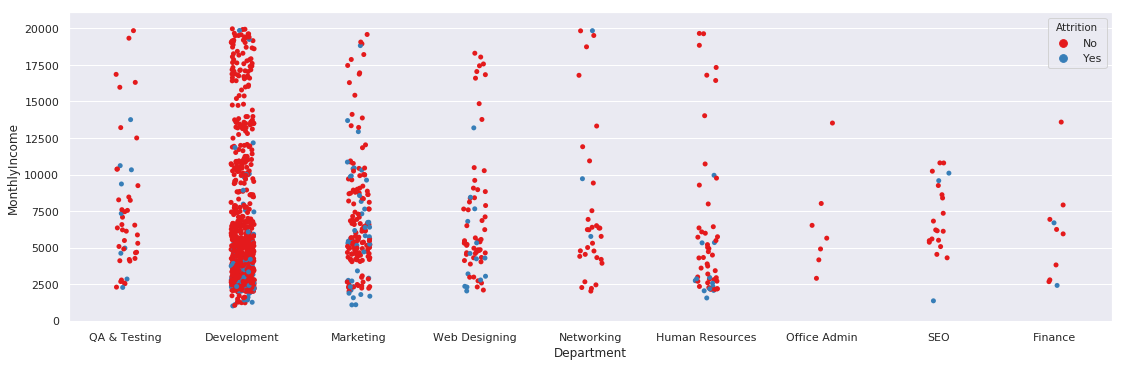

In [37]:
sns.set(rc={'figure.figsize':(18.7,5.7)})
sns.stripplot(x="Department", y="MonthlyIncome", hue="Attrition",data=hr_data, jitter=True,palette="Set1")

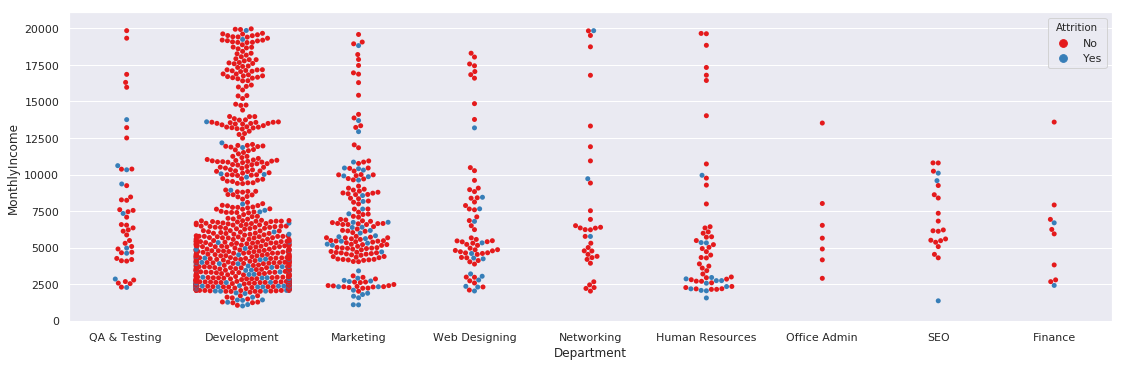

In [38]:
#sns.stripplot(x="Department", y="MonthlyIncome", hue="Attrition",data=hr_data, jitter=True,palette="Set1")
sns.swarmplot(x="Department", y="MonthlyIncome", hue="Attrition",data=hr_data, palette="Set1")

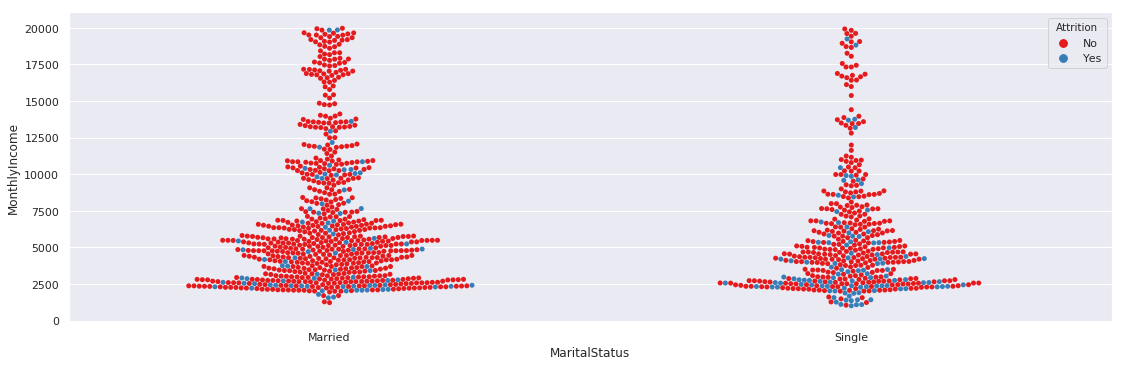

In [39]:
#sns.stripplot(x="MaritalStatus", y="MonthlyIncome", hue="Attrition",data=hr_data, jitter=True,palette="Set1")
sns.swarmplot(x="MaritalStatus", y="MonthlyIncome", hue="Attrition",data=hr_data,palette="Set1")

In [0]:
#sns.pairplot(hr_data)

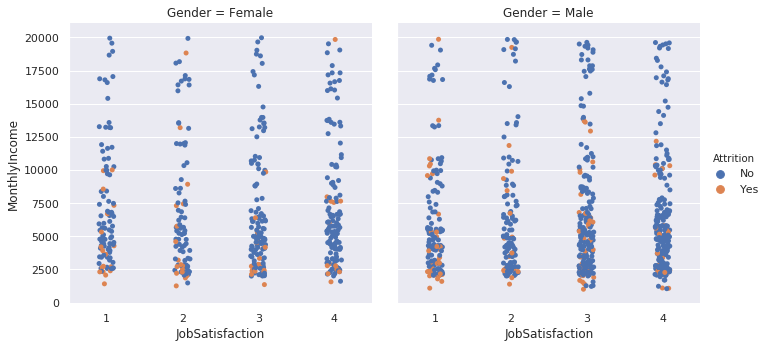

In [41]:
sns.catplot(x="JobSatisfaction",y='MonthlyIncome',col='Gender',data=hr_data,hue='Attrition')

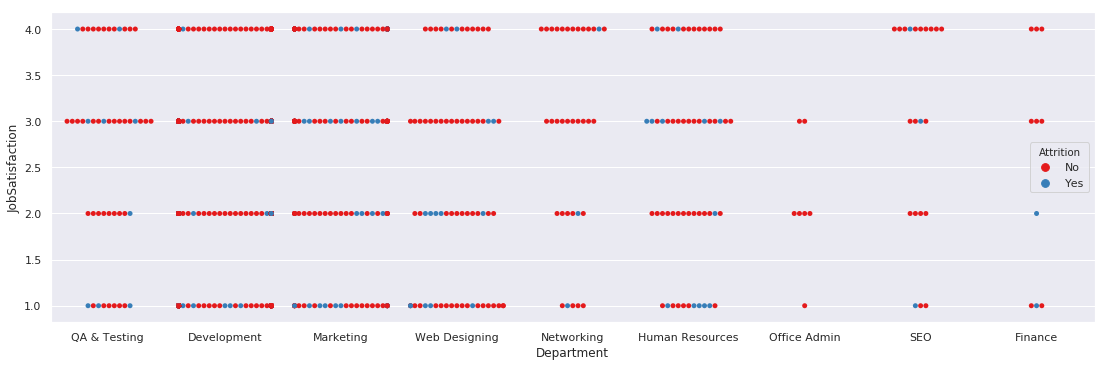

In [42]:
sns.set(rc={'figure.figsize':(18.7,5.7)})
sns.swarmplot(x="Department", y="JobSatisfaction", hue="Attrition",data=hr_data, palette="Set1")

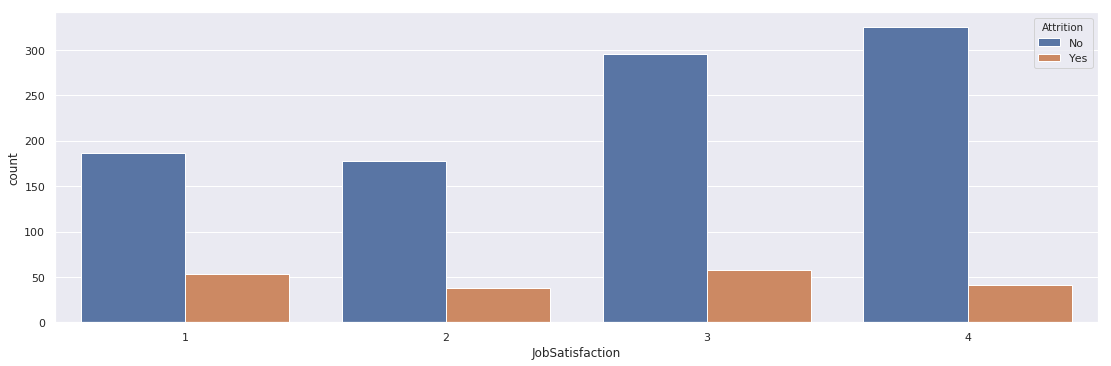

In [43]:
sns.countplot(x="JobSatisfaction",data=hr_data,hue='Attrition')

In [44]:
hr_data["PerformanceRating"].value_counts()

3    991
4    185
Name: PerformanceRating, dtype: int64

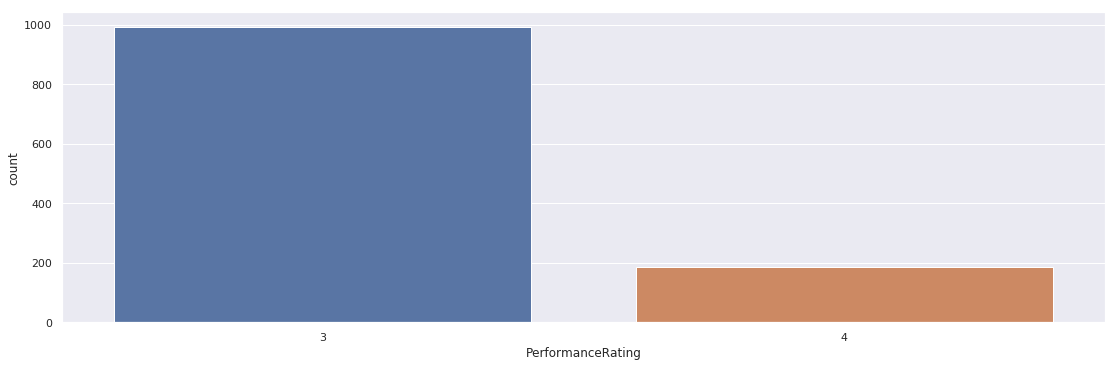

In [45]:
sns.countplot(x="PerformanceRating",data=hr_data)

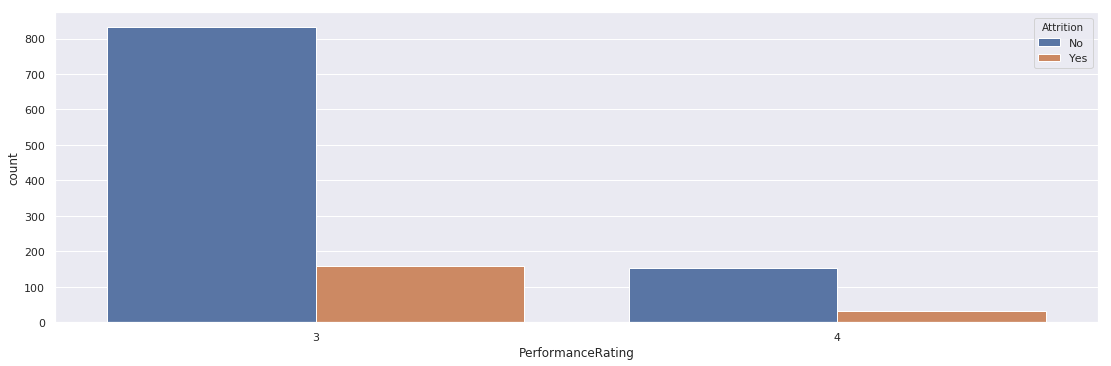

In [46]:
sns.countplot(x="PerformanceRating",data=hr_data,hue='Attrition')

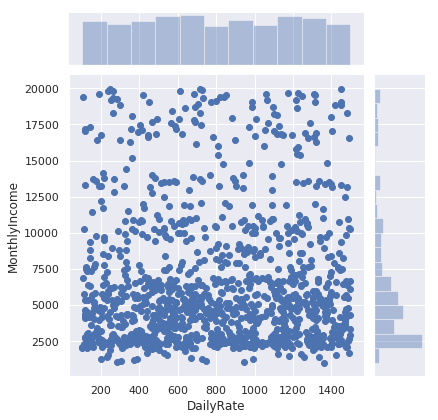

In [47]:
sns.jointplot(x="DailyRate", y="MonthlyIncome", data=hr_data)

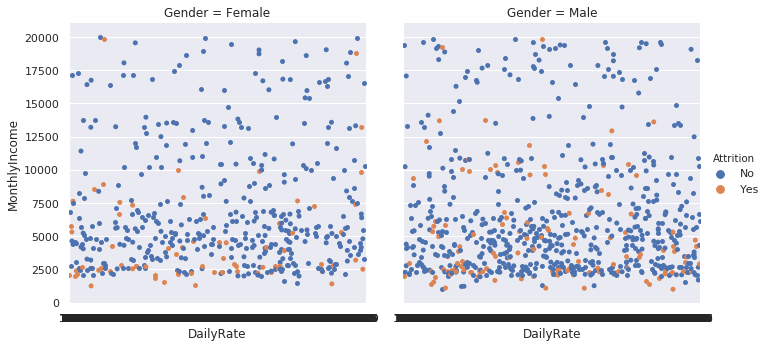

In [49]:
sns.catplot(x="DailyRate",y='MonthlyIncome',col='Gender',data=hr_data,hue='Attrition')

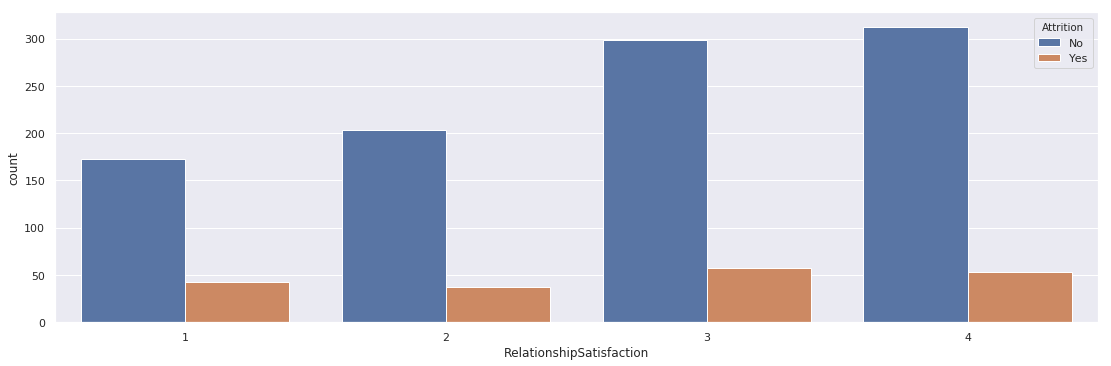

In [50]:
#hr_data['RelationshipSatisfaction'].value_counts()
sns.countplot(x="RelationshipSatisfaction",data=hr_data,hue='Attrition')

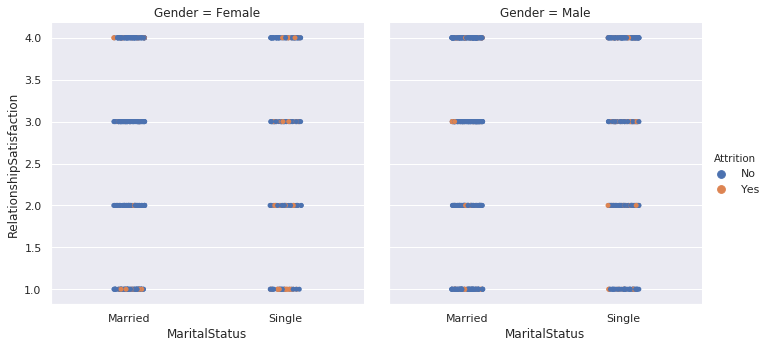

In [51]:
sns.catplot(x="MaritalStatus",y='RelationshipSatisfaction',col='Gender',data=hr_data,hue='Attrition')

**Actual Task**

In [0]:
hr_data_trim = hr_data[["Age","Attrition","BusinessTravel","Department","DistanceFromHome","Education","Gender","HourlyRate","JobInvolvement","JobLevel","JobRole","JobSatisfaction","MaritalStatus","MonthlyIncome","NumCompaniesWorked","PercentSalaryHike","PerformanceRating","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager","OverTime"]]

In [53]:
type(hr_data_trim)

pandas.core.frame.DataFrame

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe72c0ce898>,
      dtype=object)

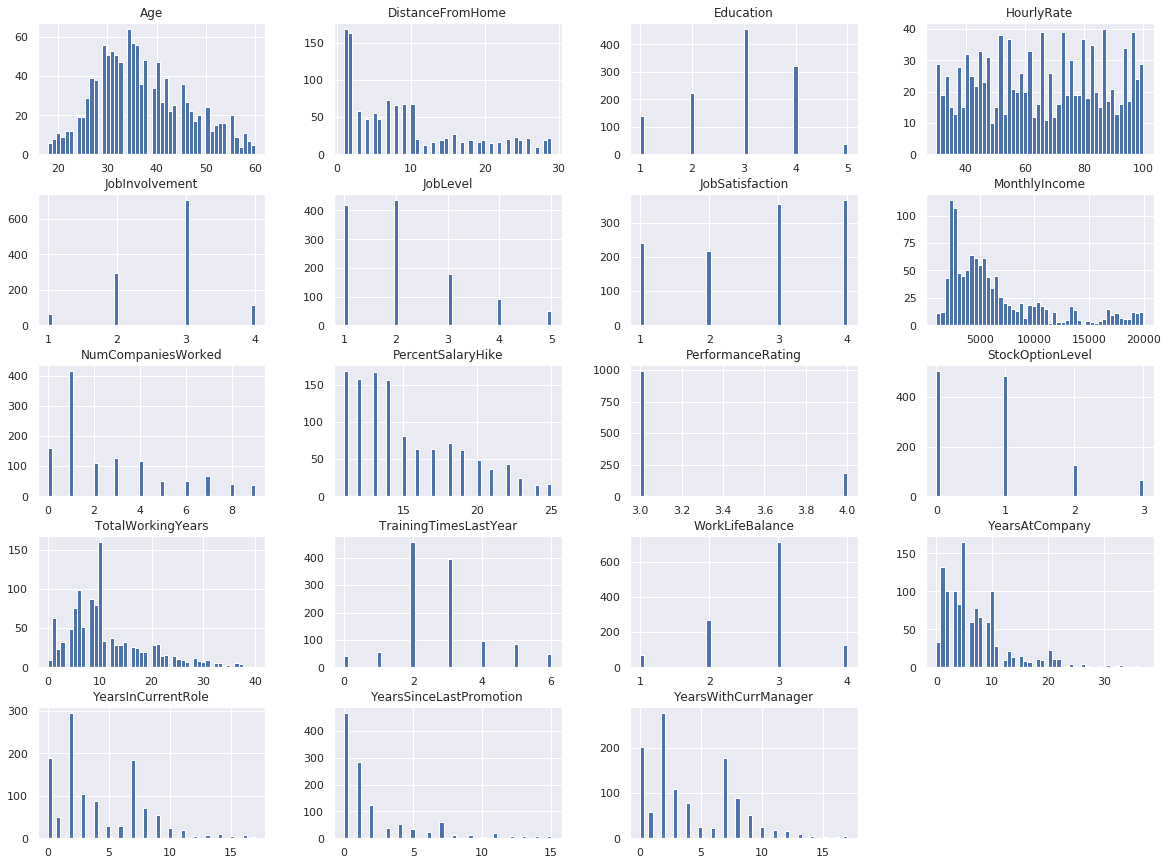

In [54]:
hr_data_trim.hist(bins=50, figsize=(20,15))

In [55]:
cat_attribute = ["Attrition","BusinessTravel","Department","Gender","JobRole","MaritalStatus","OverTime"]

for item in cat_attribute:
  print(hr_data_trim[item].value_counts())
  print ("*************************")

No     986
Yes    190
Name: Attrition, dtype: int64
*************************
Travel_Rarely        828
Travel_Frequently    225
Non-Travel           123
Name: BusinessTravel, dtype: int64
*************************
Development        753
Marketing          179
Web Designing       69
Human Resources     56
QA & Testing        47
Networking          34
SEO                 21
Finance             10
Office Admin         7
Name: Department, dtype: int64
*************************
Male      704
Female    472
Name: Gender, dtype: int64
*************************
Software Developer              539
Project Manager                 199
Marketing Executive             167
Web Designer                     61
Human Resources                  43
Manager                          28
Associate Tester                 25
System Adminstrator              22
Internet Marketing Executive     20
QA & Testing                     10
Marketing Manager                 8
Finance Executive                 7
Marketing

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe72bef3eb8>,
      dtype=object)

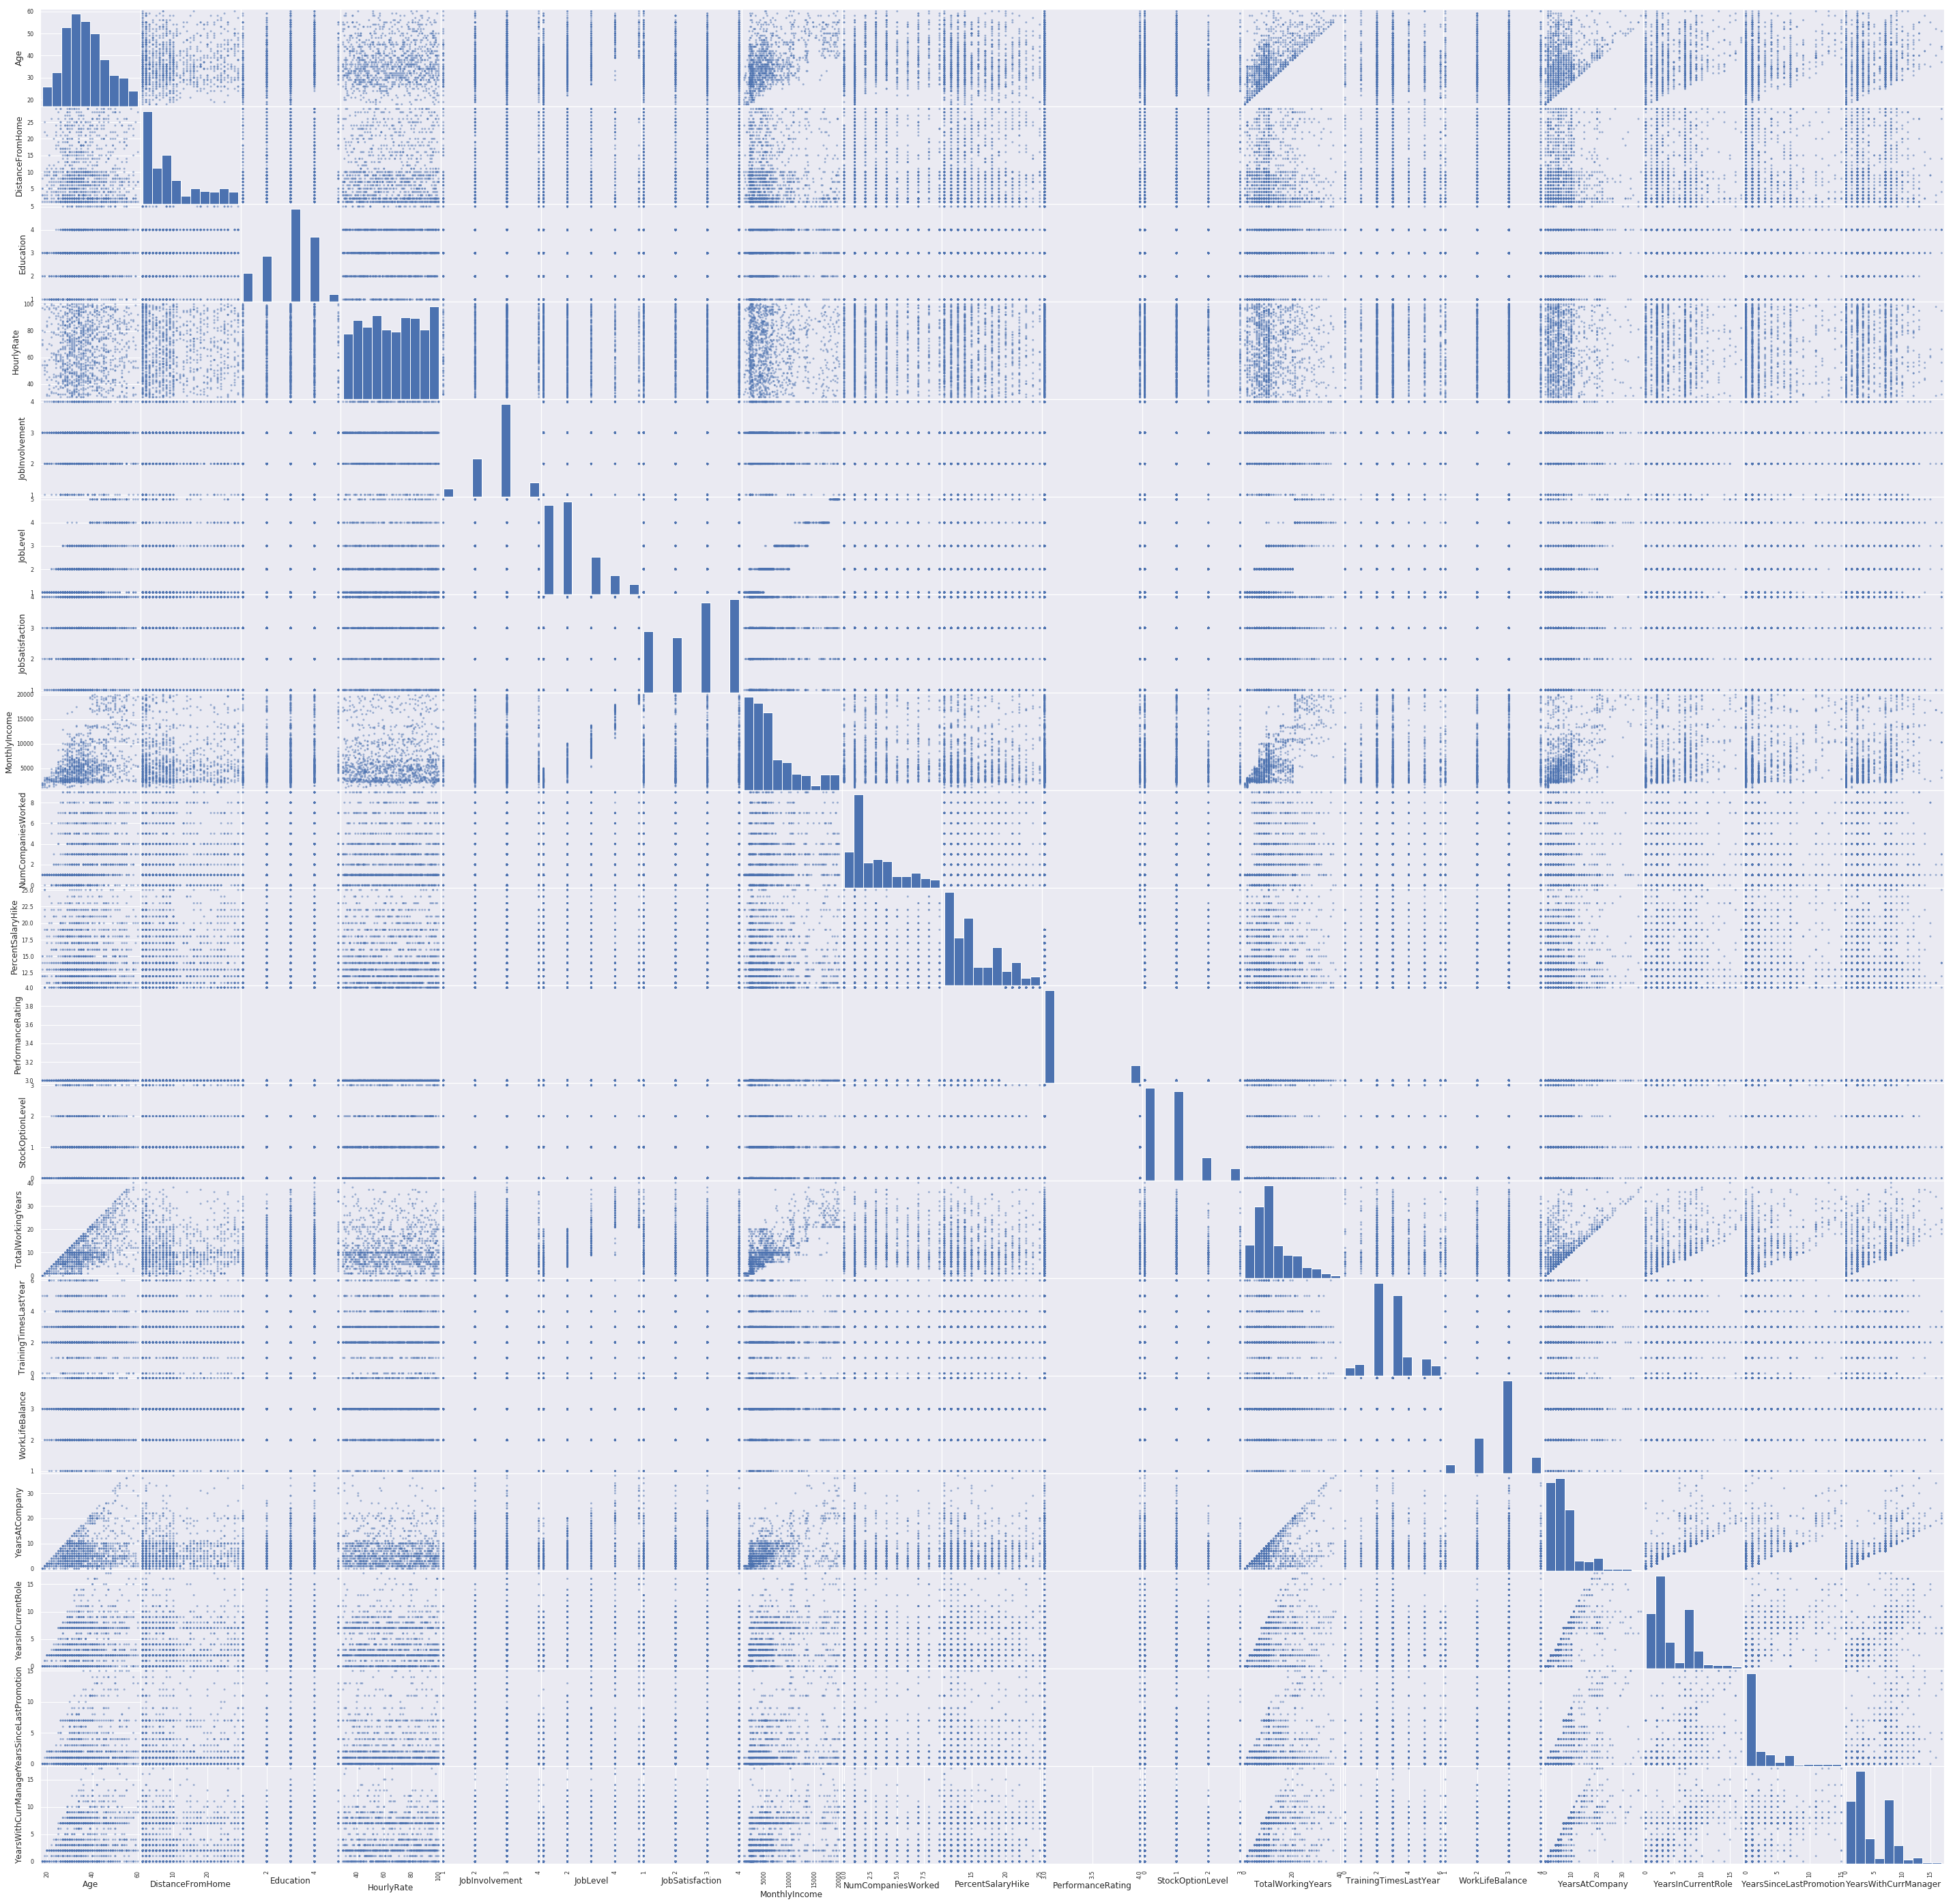

In [56]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(hr_data_trim, figsize=(50, 50))

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [0]:
numeric_atribute = list(set(hr_data_trim.columns) ^ set (cat_attribute))


In [69]:
len(numeric_atribute) + len(cat_attribute) == len(list(hr_data_trim.columns))

True

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

In [0]:
imputer = SimpleImputer(strategy="median")

In [0]:
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(numeric_atribute)),
        ('imputer',SimpleInputer)])

In [0]:
hr_data_numeric = num_pipeline.fit_transform(hr_data_trim)

In [81]:
hr_data_numeric.shape

(1176, 19)

In [0]:
# Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [0]:
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(cat_attribute)),
        ("imputer", MostFrequentImputer())])